## TransBorder Freight Data Analysis
BY PENIEL TENKORAMAH TWUM
 
 The objective of this project is to analyze the transportation data provided by the 
Bureau of Transportation Statistics (BTS) to uncover insights related to the 
efficiency, safety, and environmental impacts of freight transportation across 
TransBorder 
Freight Data 
Analysis
 various modes (road, rail, air, and water). Using this data, the goal is to identify 
inefficiencies, recognize patterns, and propose actionable solutions to improve 
the overall performance and sustainability of transportation systems

In [19]:
import os
import zipfile
import shutil
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.ticker as mtick
from adjustText import adjust_text
import plotly.express as px
import geopandas as gpd

### DATA EXTRACTION
The data has zip files embedded in other zip files which have to be extracted. 

###### all csv files are extracted from subfolders

#### Appending of all similar file content based on file naming across all years


### Creating of dataFrames

In [2]:
dot1 = pd.read_csv('dot1_merge_2020_2024.csv')
dot2 = pd.read_csv('dot2_merge_2020_2024.csv')
dot3 = pd.read_csv('dot3_merge_2020_2024.csv')

### Exploratory Data Analysis (EDA)
Understanding Data Structure

In [3]:
dot1.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,source_file
0,1,AK,07XX,3,NaN,XA,1220,3302,378,125,1.0,X,1,2020,dot1_0120.csv
1,1,AK,20XX,3,NaN,XA,1220,133362,137,1563,1.0,X,1,2020,dot1_0120.csv
2,1,AK,20XX,3,NaN,XA,1220,49960,66,2631,2.0,X,1,2020,dot1_0120.csv
3,1,AK,20XX,3,NaN,XC,1220,21184,3418,795,1.0,X,1,2020,dot1_0120.csv
4,1,AK,20XX,3,NaN,XM,1220,4253,2,75,1.0,X,1,2020,dot1_0120.csv


In [4]:
dot2.head()

,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,source_file
0,1,AK,2,5,BC,NaN,2010,34800,0,0,1.0,0,1,2020,dot2_0120.csv
1,1,AK,2,5,CM,NaN,2010,36055,0,0,1.0,0,1,2020,dot2_0120.csv
2,1,AK,3,3,NaN,XQ,1220,2979,236,40,1.0,X,1,2020,dot2_0120.csv
3,1,AK,3,5,NaN,XC,1220,678610,0,13524,1.0,X,1,2020,dot2_0120.csv
4,1,AK,3,5,NaN,XC,1220,53448,0,732,2.0,X,1,2020,dot2_0120.csv


In [5]:
dot3.head()

,TRDTYPE,DEPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,source_file
0,1,0101,27,5,1220,3978,0,116,1.0,X,1,2020,dot3_0120.csv
1,1,0101,28,5,1220,3614,0,71,1.0,X,1,2020,dot3_0120.csv
2,1,0101,29,5,1220,12436,0,243,1.0,X,1,2020,dot3_0120.csv
3,1,0101,29,5,1220,24764,0,485,2.0,X,1,2020,dot3_0120.csv
4,1,0101,34,5,1220,33250,0,615,1.0,X,1,2020,dot3_0120.csv


In [6]:
print(f"Dot 1 Shape: {dot1.shape}")
print(f"Dot 2 Shape: {dot2.shape}")
print(f"Dot 3 Shape: {dot3.shape}")

Dot 1 Shape: (1500485, 15)
Dot 2 Shape: (4101624, 15)
Dot 3 Shape: (915116, 13)


##### Null vales and Data Types

In [7]:
print(f"Dot 1 Null Entries  :{dot1.isnull().sum()}")
print(f"Dot 2 Null Entries  :{dot2.isnull().sum()}")
print(f"Dot 3 Null Entries  :{dot3.isnull().sum()}")


Dot 1 Null Entries  :TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                  565200
CONTCODE                 0
MONTH                    0
YEAR                     0
source_file              0
dtype: int64
Dot 2 Null Entries  :TRDTYPE                  0
USASTATE                 0
COMMODITY2               0
DISAGMOT                 0
MEXSTATE           2700940
CANPROV            1651792
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 1251187
CONTCODE                 0
MONTH                    0
YEAR                     0
source_file              0
dtype: int64
Dot 3 Null Entries  :TRDTYPE                 0
DEPE                    0
COMMODITY2              0
DISAGMOT               

In [8]:
print(f"Dot 1 Data Type: {dot1.dtypes}")
print(f"Dot 2 Data Type: {dot2.dtypes}")
print(f"Dot 3 Data Type: {dot3.dtypes}")

Dot 1 Data Type: TRDTYPE              int64
USASTATE            object
DEPE                object
DISAGMOT             int64
MEXSTATE            object
CANPROV             object
COUNTRY              int64
VALUE                int64
SHIPWT               int64
FREIGHT_CHARGES      int64
DF                 float64
CONTCODE            object
MONTH                int64
YEAR                 int64
source_file         object
dtype: object
Dot 2 Data Type: TRDTYPE              int64
USASTATE            object
COMMODITY2           int64
DISAGMOT             int64
MEXSTATE            object
CANPROV             object
COUNTRY              int64
VALUE                int64
SHIPWT               int64
FREIGHT_CHARGES      int64
DF                 float64
CONTCODE            object
MONTH                int64
YEAR                 int64
source_file         object
dtype: object
Dot 3 Data Type: TRDTYPE              int64
DEPE                object
COMMODITY2           int64
DISAGMOT             int64
COU

### Compare Data Similarity
This process is to explore if the datasets are the same

In [9]:
print(f"Dot 1 Total Value: {dot1['VALUE'].sum()}")
print(f"Dot 2 Total Value: {dot2['VALUE'].sum()}")
print(f"Dot 3 Total Value: {dot3['VALUE'].sum()}")

Dot 1 Total Value: 6443982384570
Dot 2 Total Value: 6443982384570
Dot 3 Total Value: 6310442051088


### Business Objectives And Questions
1. How do goods values differ between Countries over the years?


2. What transport modes are most commonly used, and how do they compare in terms of freight charges between export and import?


3. Are there seasonal trends in freight movement comparing the months in a year?


4. What is the correlation between shipment weight and freight charges?


5. Which US states handle the most freight traffic across borders?


6. Which states/provinces in Mexico and Canada are the most active in trade?


7. What are the top commodities exported/imported by value and weight?


8. Percentage of Domestically produced and Foreign sourced items.

### Categorical Mapping

In [11]:
### country mapping
country_map = {
    1220: 'Canada',
    2010: 'Mexico'
}

dot1['country_mapped'] = dot1['COUNTRY'].map(country_map).fillna(dot1['COUNTRY']) 
dot2['country_mapped'] = dot2['COUNTRY'].map(country_map).fillna(dot2['COUNTRY']) 
dot3['country_mapped'] = dot3['COUNTRY'].map(country_map).fillna(dot3['COUNTRY']) 

In [12]:
# origin  mapping
origin_map = {1: 'Domestic', 2: 'Foreign'}

dot1['origin_mapped'] = dot1['DF'].map(origin_map).fillna('Unknown')
dot2['origin_mapped'] = dot2['DF'].map(origin_map).fillna('Unknown')
dot3['origin_mapped'] = dot3['DF'].map(origin_map).fillna('Unknown')

dot2['origin_mapped'].unique()


array(['Domestic', 'Foreign', 'Unknown'], dtype=object)

In [34]:
#transport mode mapping
mode_map = { 1: 'Vessel', 3: 'Air', 4: 'Mail', 5: 'Truck', 6: 'Rail', 7: 'Pipeline', 8: 'Other', 9: 'Foreign Trade Zones'}

dot1['mode_mapped'] = dot1['DISAGMOT'].map(mode_map).fillna(dot1['DISAGMOT']) 
dot2['mode_mapped'] = dot2['DISAGMOT'].map(mode_map).fillna(dot2['DISAGMOT']) 
dot3['mode_mapped'] = dot3['DISAGMOT'].map(mode_map).fillna(dot3['DISAGMOT']) 

#Trade Type  mapping
tradetype_map = { 1: 'Export', 2: 'Import'}

dot1['tradetype_mapped'] = dot1['TRDTYPE'].map(tradetype_map).fillna(dot1['TRDTYPE']) 
dot2['tradetype_mapped'] = dot2['TRDTYPE'].map(tradetype_map).fillna(dot2['TRDTYPE'])
dot3['tradetype_mapped'] = dot3['TRDTYPE'].map(tradetype_map).fillna(dot3['TRDTYPE']) 

In [46]:
#project colors
pcolor=['#606C38', '#283618', '#FEFAE0', '#DDA15E', '#BC6C25','#F5F5F5', '#D6CCC2', '#ADC178', '#A98467', '#6C584C']

### Data Visualization

##### Goods value comparing country over time

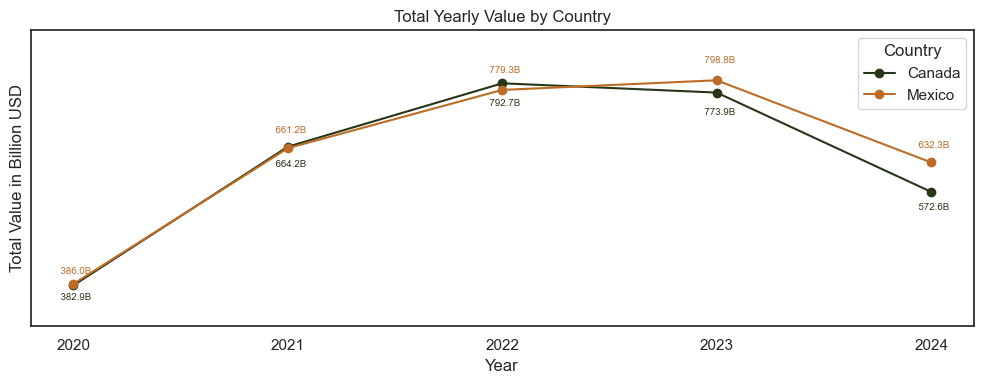

In [84]:
df = pd.DataFrame(dot2)
grouped = df.groupby(['YEAR', 'country_mapped'])['VALUE'].sum().unstack()

color_dict = {
    'Canada': '#283618',   # green
    'Mexico': '#BC6C25',   # Orange
}

fig, ax = plt.subplots(figsize=(10, 4))
texts = []
for country in grouped.columns:
    color = color_dict.get(country, 'gray')
    line, = ax.plot(grouped.index, grouped[country], marker='o', label=country, color=color)

    for i, year in enumerate(grouped.index):
        value = grouped[country].iloc[i]
        if pd.notna(value):
            offset = 0.04 * value if country == 'Mexico' else -0.04 * value
            va = 'bottom' if country == 'Mexico' else 'top'

            text = ax.text(
                year,
                value + offset,
                f'  {value / 1e9:.1f}B',
                fontsize=7,
                color=color,
                ha='center',
                va=va
            )
            texts.append(text)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))
ax.set_ylim(3e11,9e11)

ax.set_xlabel('Year')
ax.set_ylabel('Total Value in Billion USD')
ax.set_title('Total Yearly Value by Country')
ax.set_xticks(grouped.index)
ax.set_xticklabels(grouped.index)
ax.legend(title='Country')
ax.yaxis.set_ticks([])
ax.yaxis.set_ticklabels([])
ax.grid(False)

plt.tight_layout()
plt.savefig('YearlyValuebyCountry.png')
plt.show()

#### Transport Mode VS Freight Charges and Trade Type

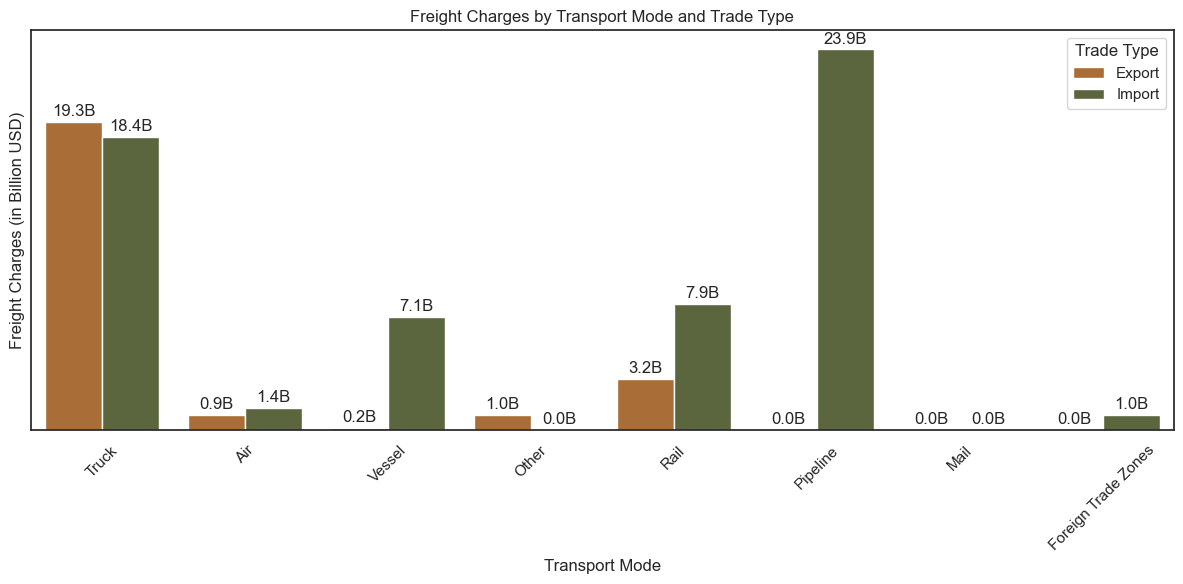

In [85]:

freight_summary = dot2.groupby(['mode_mapped', 'tradetype_mapped'])['FREIGHT_CHARGES'].sum().reset_index()

freight_summary['FREIGHT_CHARGES'] = freight_summary['FREIGHT_CHARGES'] / 1e9

all_modes = dot2['mode_mapped'].unique()
all_trade_types = dot2['tradetype_mapped'].unique()
full_index = pd.MultiIndex.from_product([all_modes, all_trade_types], names=['mode_mapped', 'tradetype_mapped'])

freight_summary = (
    freight_summary.set_index(['mode_mapped', 'tradetype_mapped'])
    .reindex(full_index, fill_value=0)
    .reset_index()
)
custom_palette = {
    'Export': '#BC6C25',
    'Import': '#606C38'
}

sns.set(style="white")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=freight_summary,
    x='mode_mapped',
    y='FREIGHT_CHARGES',
    hue='tradetype_mapped',
    palette=custom_palette
)

for container in barplot.containers:
    barplot.bar_label(
        container,
        labels=[f'{v.get_height():.1f}B' for v in container],
        label_type='edge',
        padding=2
    )

plt.ylabel('Freight Charges (in Billion USD)')
plt.xlabel('Transport Mode')
plt.title('Freight Charges by Transport Mode and Trade Type')
plt.xticks(rotation=45)
plt.yticks([])
plt.legend(title='Trade Type')
plt.tight_layout()
plt.savefig('Transportmodevstradetype.png')
plt.show()


##### Seasonal Trends in High Commodity Value and Hight freight volume 

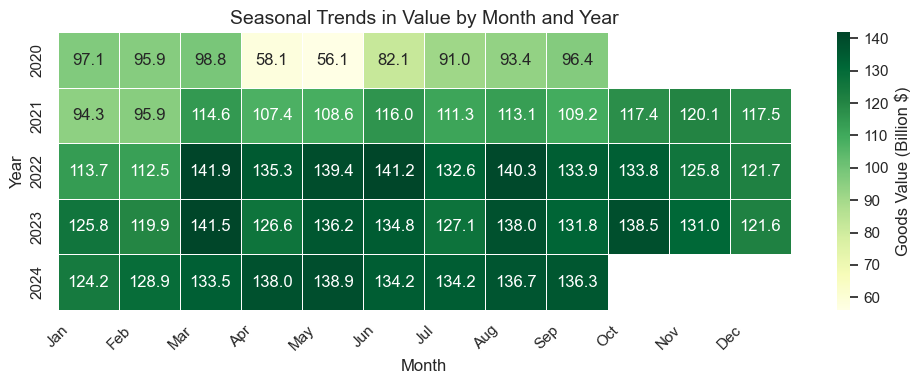

In [57]:

df['MONTH'] = pd.to_numeric(df['MONTH'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# Group by YEAR and MONTH, and aggregate desired metric (e.g., VALUE)
monthly_value = df.groupby(['YEAR', 'MONTH'])['VALUE'].sum().unstack()

# convert to billions
monthly_value = monthly_value / 1e9

plt.figure(figsize=(10, 4))
sns.heatmap(
    monthly_value,
    cmap='YlGn',
    linewidths=0.5,
    annot=True,
    fmt=".1f",
    cbar_kws={'label': 'Goods Value (Billion $)'}
)

plt.title('Seasonal Trends in Value by Month and Year', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.tight_layout()
plt.savefig('Seasonal_value_trend.png')
plt.show()


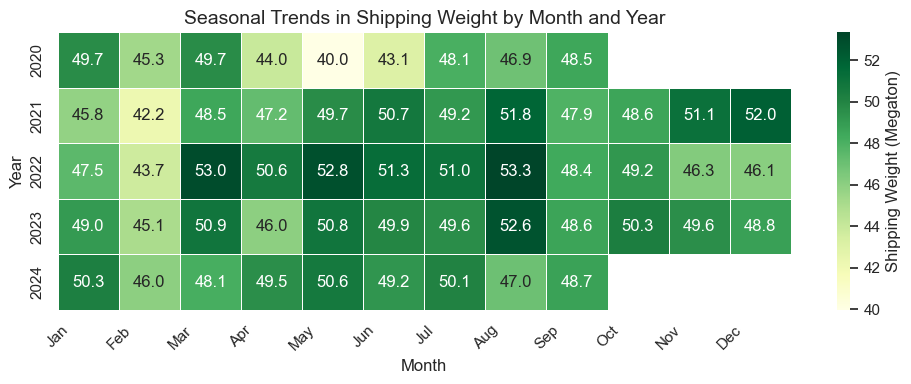

In [58]:
df['MONTH'] = pd.to_numeric(df['MONTH'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# Group by YEAR and MONTH, and aggregate desired metric (e.g., VALUE)
monthly_metric = df.groupby(['YEAR', 'MONTH'])['SHIPWT'].sum().unstack()

# convert to Megaton
monthly_metric = monthly_metric / 1e9

plt.figure(figsize=(10, 4))
sns.heatmap(
    monthly_metric,
    cmap='YlGn',
    linewidths=0.5,
    annot=True,
    fmt=".1f",
    cbar_kws={'label': 'Shipping Weight (Megaton)'}
)

plt.title('Seasonal Trends in Shipping Weight by Month and Year', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.tight_layout()
plt.savefig('Seasonal_weight_trend.png')
plt.show()


##### Relationship Between Freight Charges and Weight

In [43]:
df_clean = df[['SHIPWT', 'FREIGHT_CHARGES']].dropna()

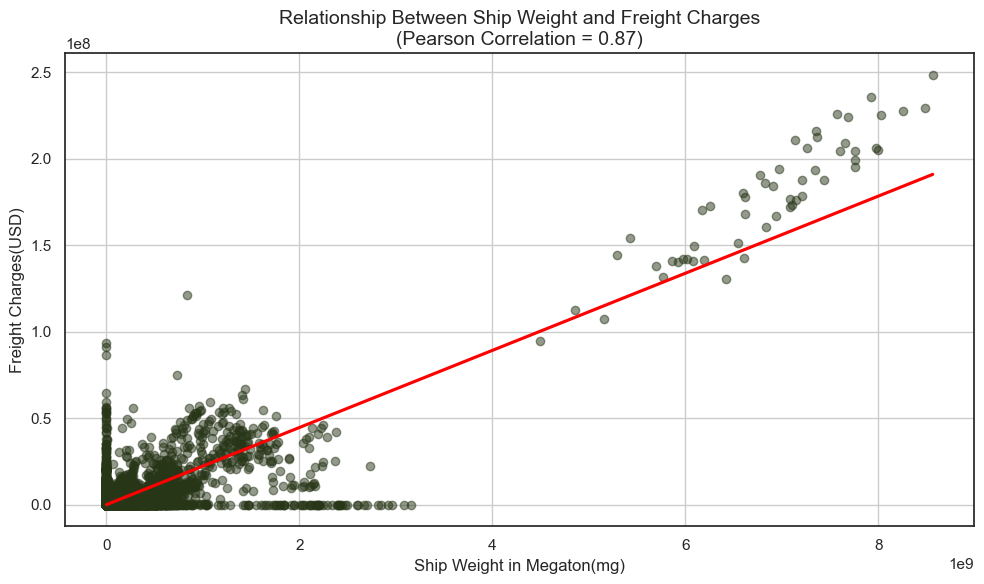

In [44]:
# Calculate Pearson correlation coefficient
corr, _ = pearsonr(df_clean['SHIPWT'], df_clean['FREIGHT_CHARGES'])

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x='SHIPWT',
    y='FREIGHT_CHARGES',
    scatter_kws={'alpha': 0.5, 'color': '#283618'},
    line_kws={'color': 'red'}, ci=None
    
)

plt.title(f'Relationship Between Ship Weight and Freight Charges\n(Pearson Correlation = {corr:.2f})', fontsize=14)
plt.xlabel('Ship Weight in Megaton(mg)')
plt.ylabel('Freight Charges(USD)')
plt.grid(True)
plt.tight_layout()
plt.savefig('correlation.png')
plt.show()

As shipment weight increases, freight charges also increase, and they do so in a strong and consistent manner.

##### USA States and freight value mapping

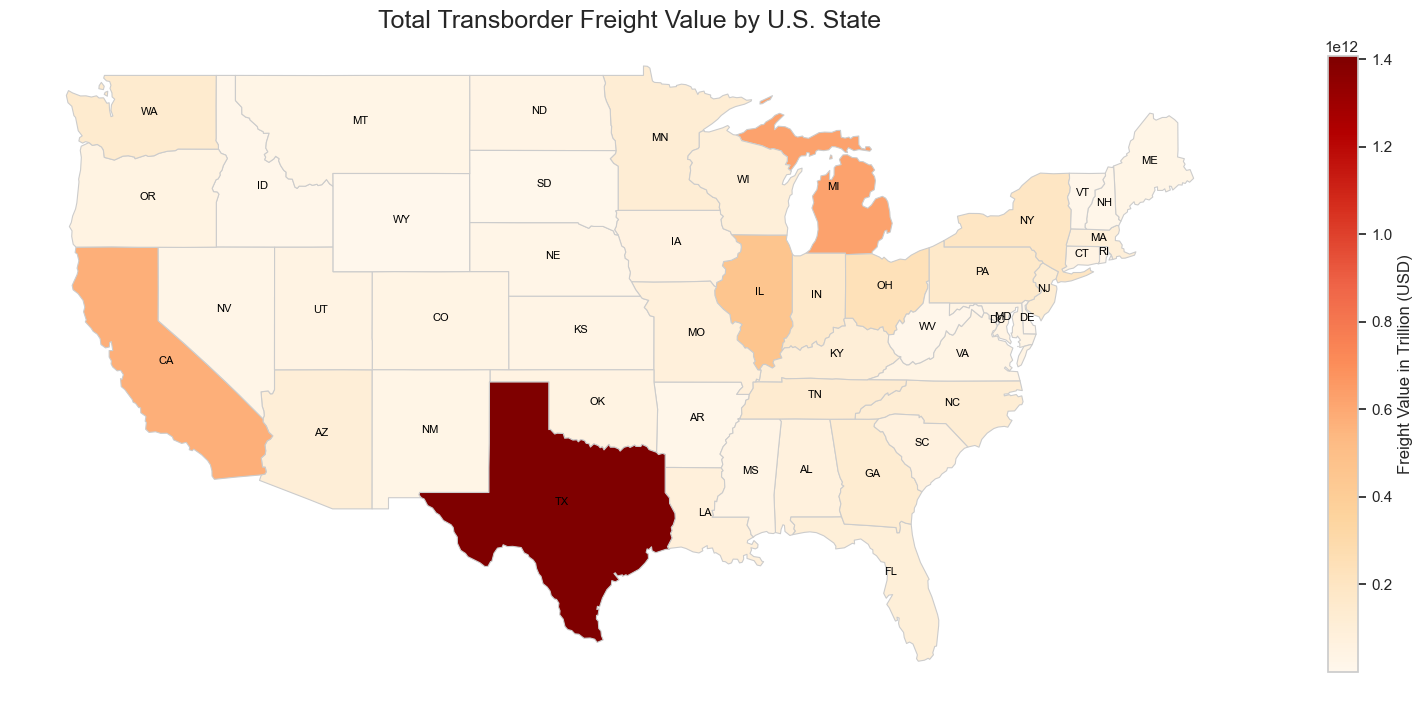

In [80]:

us_states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

 # Aggregate data
state_agg = df.groupby("USASTATE")[["VALUE"]].sum().reset_index()
state_agg.columns = ['state_abbrev', 'value']

# Abbreviation to full name
abbr_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia', 'DU': 'Unknown'
}

#  Map abbreviations to full state names
state_agg['state'] = state_agg['state_abbrev'].map(abbr_to_name)

#  Merge with GeoJSON
merged = us_states.merge(state_agg, left_on='name', right_on='state')

#  Drop Alaska and  Hawaii
merged = merged[merged['name'] != 'Alaska']
merged = merged[merged['name'] != 'Hawaii']

# 7. Plot with custom legend only
fig, ax = plt.subplots(1, 1, figsize=(20, 16))
plot = merged.plot(
    column='value',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Freight Value in Trillion (USD)",
        'orientation': "vertical",
        'shrink': 0.5
    }
)

# state labels
for idx, row in merged.iterrows():
    plt.annotate(
        text=row['state_abbrev'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        ha='center',
        fontsize=8,
        color='black'
    )

ax.set_title("Total Transborder Freight Value by U.S. State", fontsize=18)
ax.axis('off')
plt.savefig('map2.png')
plt.show()


##### Top 5 Meico States and Top Canada Province based on high Value accross the 5 years

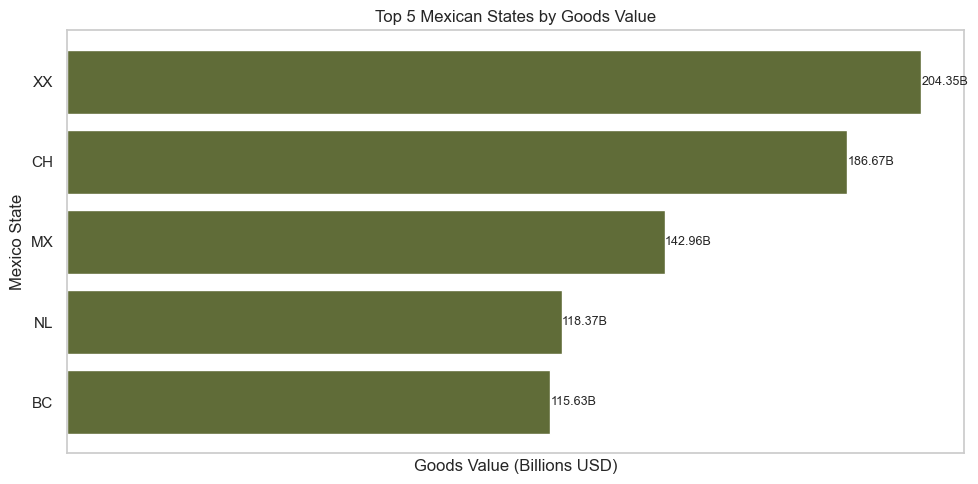

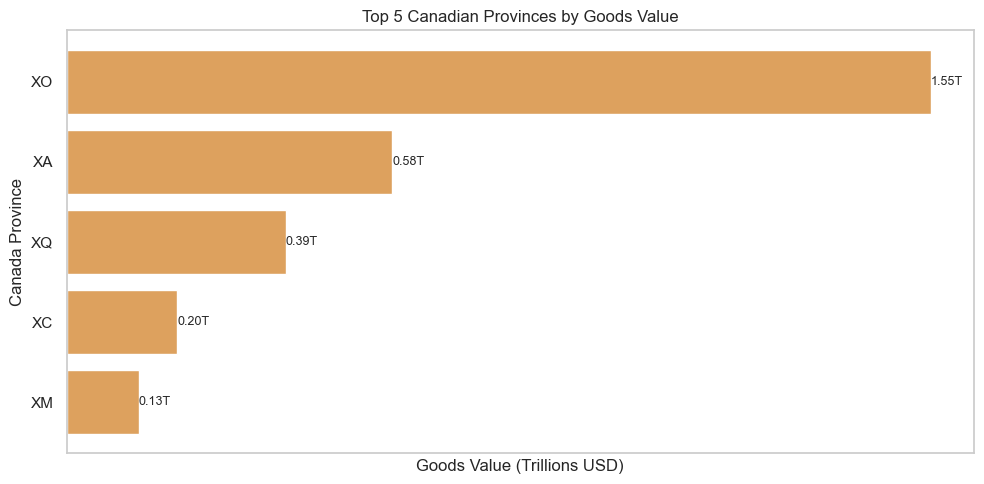

In [81]:
top_mexico = (
    df[df['country_mapped'] == 'Mexico']
    .groupby('MEXSTATE')['VALUE']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_canada = (
    df[df['country_mapped'] == 'Canada']
    .groupby('CANPROV')['VALUE']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_mexico_billions = top_mexico / 1e9
top_canada_trillions = top_canada / 1e12

plt.figure(figsize=(10, 5))
bars_mex = plt.barh(top_mexico_billions.index, top_mexico_billions.values, color=pcolor[0])
plt.gca().invert_yaxis()
plt.title('Top 5 Mexican States by Goods Value')
plt.xlabel('Goods Value (Billions USD)')
plt.ylabel('Mexico State')

for bar in bars_mex:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.2f}B', 
        va='center', 
        ha='left',
        fontsize=9
    )

plt.xticks([])
plt.grid(False)
plt.tight_layout()
plt.savefig('Mexico_Top5.png')
plt.show()

plt.figure(figsize=(10, 5))
bars_can = plt.barh(top_canada_trillions.index, top_canada_trillions.values, color=pcolor[3])
plt.gca().invert_yaxis()
plt.title('Top 5 Canadian Provinces by Goods Value')
plt.xlabel('Goods Value (Trillions USD)')
plt.ylabel('Canada Province')

for bar in bars_can:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.2f}T', 
        va='center', 
        ha='left',
        fontsize=9
    )

plt.xticks([])
plt.grid(False)
plt.tight_layout()
plt.savefig('Canada_Top5.png')
plt.show()

###### Top Valued Commodities by Import or Export

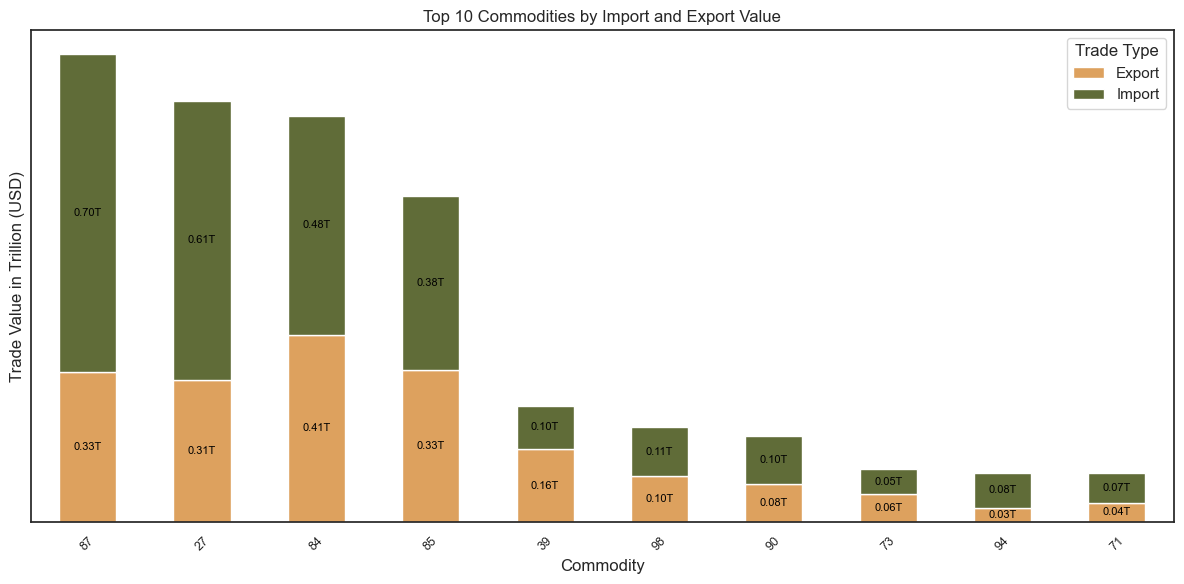

In [62]:
commodity_trade = (
    df.groupby(['COMMODITY2', 'tradetype_mapped'])['VALUE']
      .sum()
      .reset_index()
)

pivot = (
    commodity_trade
    .pivot(index='COMMODITY2', columns='tradetype_mapped', values='VALUE')
    .fillna(0)
)

pivot['Total'] = pivot.sum(axis=1)
top10 = (
    pivot.sort_values('Total', ascending=False)
         .head(10)
         .drop(columns='Total')
)

fig, ax = plt.subplots(figsize=(12, 6))
top10.plot(kind='bar', stacked=True, ax=ax, color=custom_palette)

for container in ax.containers:                     
    labels = [f'{v/1e12:.2f}T' if v else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels,
                 label_type='center', fontsize=8, color='black')

ax.set_title('Top 10 Commodities by Import and Export Value')
ax.set_xlabel('Commodity')
ax.set_ylabel('Trade Value in Trillion (USD)')
ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.legend(title='Trade Type')
plt.yticks([])
plt.tight_layout()
plt.savefig('High_Value_Commodities_Top10.png')
plt.show()


##### Commodity mapping

-87: "Vehicles & parts

-27: "Fuels"

-84: "Machinery and appliances

-85: Electronics

-39: Plastic products

-98: Special category

-90: Optical Instruments

-73: Iron or Steel

-94:Furniture

-71: Jewelry

#### Percentage of Trade Type

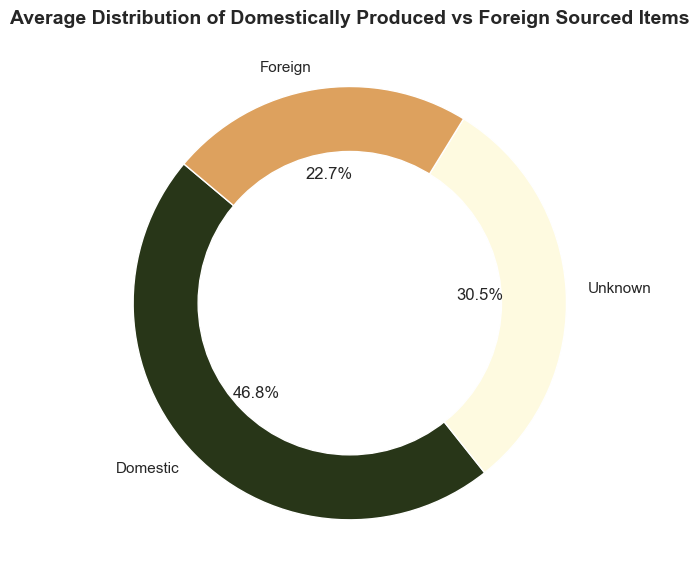

In [78]:
sns.set_style("whitegrid")

domestic_foreign_counts = df["origin_mapped"].value_counts()
domestic_foreign_percent = domestic_foreign_counts / domestic_foreign_counts.mean() * 100

colors = pcolor[1:4]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    domestic_foreign_percent,
    labels=domestic_foreign_percent.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title("Average Distribution of Domestically Produced vs Foreign Sourced Items", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('Commodit_origin.png')
plt.show()



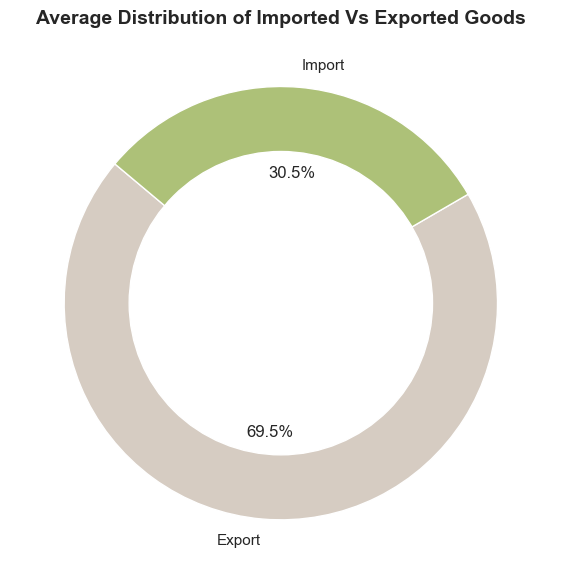

In [79]:
sns.set_style("whitegrid")

trade_type_counts = df["tradetype_mapped"].value_counts()
trade_type_percent = trade_type_counts / trade_type_counts.mean() * 100

colors = pcolor[6:9]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    trade_type_percent,
    labels=trade_type_percent.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title("Average Distribution of Imported Vs Exported Goods", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('pie_tradetype.png')
plt.show()


### Business Recommendations
#### 1.	Prioritize Infrastructure Development in High-Freight States

Insight Basis: Texas, California, and Michigan lead in total freight volume.

Recommendation:
Invest in expanding and maintaining road, rail, and port infrastructure in these states to reduce congestion, improve efficiency, and support increasing freight volumes.


#### 2. Prepare for Seasonal Freight Surges

Insight Basis: Summer months (May–August) consistently show peak shipping weights.

Recommendation:

Logistics firms and customs agencies should allocate more staff and resources during these periods to reduce delays and ensure smooth cross-border movement.


#### 3. Enhance Supply Chain Transparency

Insight Basis: 30.5% of items have an unknown origin.

Recommendation:
Implement stronger product tracking and labeling requirements to increase traceability and compliance, especially for foreign-sourced items, to improve reporting and reduce risks.


#### 4. Promote Export-Friendly Trade Policies

Insight Basis: Exports dominate the trade balance at 69.5%.

Recommendation:
Leverage this export strength by negotiating favorable trade terms, reducing tariffs, and supporting local producers with incentives and logistics support to sustain growth.


#### 5. Optimize Shipping Weight to Manage Freight Costs

Insight Basis: Strong positive correlation (r = 0.87) between shipping weight and freight charges.

Recommendation:
Encourage businesses to consolidate shipments, use predictive analytics for demand, and explore alternative transport modes to manage weight efficiently and reduce freight costs.


### Conclusion

The analysis revealed clear seasonal shipping trends, a steady increase in freight weight over time, and Texas as the top trade hub. A strong correlation exists between ship weight and charges, and exports dominate imports. These insights suggest the need for improved infrastructure planning, data transparency, and adaptive logistics strategies for better cross-border freight management